In [1]:
# Internal library imports
from calculations import *
from sqlFunctions import *
from dataAnalysisFunctions import *

In [2]:
# External library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# Loading the database file
databaseData = pd.read_csv("REFL0100N1504galaxyData.txt", names=["Xcom", "Ycom", "Zcom", "gn", "sgn", "stellarMass", "vx", "vy", "vz", "sfr", "id", "rg", "rs", "radius"])

databaseData = databaseData[databaseData["stellarMass"] > 3e9]

In [4]:
# Importing the saved csv
galaxyData = pd.read_csv("galaxyDataSave1.csv", delimiter=",")

galaxyData = removeNulls(galaxyData)

galaxyData[galaxyData["Theta"] == "90.0"]

c:\Users\Matth\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])


,Unnamed: 0,GalaxyID,Mass,Star Formation Rate,Particles,Velocity,Theta,Phi,Inclination,N Particles,Star Formation Rate Density,Stellar Density,Rotation Velocity
16,16,9350107.0,22198947840,0.507677,True,43.16460828293326846,90.0,0.0,90.0,70.0,0.008152,3.564758e+08,147.420756
17,17,9350107.0,22198947840,0.507677,True,52.928813054804264602,90.0,60.0,90.0,124.0,0.008152,3.564758e+08,147.420756
18,18,9350107.0,22198947840,0.507677,True,13.512431958038756634,90.0,120.0,90.0,62.0,0.008152,3.564758e+08,147.420756
19,19,9350107.0,22198947840,0.507677,True,-13.352236970001947816,90.0,180.0,90.0,25.0,0.008152,3.564758e+08,147.420756
20,20,9350107.0,22198947840,0.507677,True,-38.09975526184190068,90.0,240.0,90.0,25.0,0.008152,3.564758e+08,147.420756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210799,210799,58335132.0,3317714944,0.425922,True,-8.7156253515018158,90.0,120.0,90.0,121.0,0.034403,2.679791e+08,91.661150
210800,210800,58335132.0,3317714944,0.425922,True,-16.487441365211265713,90.0,180.0,90.0,41.0,0.034403,2.679791e+08,91.661150
210801,210801,58335132.0,3317714944,0.425922,True,17.343633587875038886,90.0,240.0,90.0,52.0,0.034403,2.679791e+08,91.661150
210802,210802,58335132.0,3317714944,0.425922,True,25.034751422070095885,90.0,300.0,90.0,92.0,0.034403,2.679791e+08,91.661150


In [5]:
''' EAGLE Galaxy Database Calculations '''

# Loading the database file
databaseData = pd.read_csv("REFL0100N1504galaxyData.txt", names=["Xcom", "Ycom", "Zcom", "gn", "sgn", "stellarMass", "vx", "vy", "vz", "sfr", "id", "rg", "rs", "radius"])

# Extracting the components we want
galaxyStellarMass = databaseData["stellarMass"].to_numpy() * u.Msun
galaxyStarFormationRate = databaseData["sfr"].to_numpy() * u.Msun / u.yr
galaxyRadius = databaseData["radius"].to_numpy() * u.kpc

# Feeding these into our calculation functions
galaxyRotationVelocity = rotationVelocity(galaxyStellarMass)
galaxySFRDensity = sfrDensity(galaxyStarFormationRate, galaxyRadius)
galaxySDensity = sDensity(galaxyStellarMass, galaxyRadius)

# Attaching these to the database
databaseData["vRot"] = galaxyRotationVelocity.value
databaseData["SFRDensity"] = galaxySFRDensity.value
databaseData["sDensity"] = galaxySDensity.value

In [6]:
''' Adding calculated values to observed table '''

# Importing the data from running main.py
galaxyData = pd.read_csv("linuxData/galaxyData2.csv", delimiter=",")

# Creating empty arrays to store our values
sfrDensities = []
sDensities = []
vRotations = []

# Looping through each observation 
for i in tqdm(range(len(galaxyData))):
    data = databaseData[databaseData["id"] == galaxyData.iloc[i]["GalaxyID"]]

    # Appending the corresponding value in the EAGLE galaxy database
    if len(data) > 0:
        sfrDensities.append(data["SFRDensity"].to_numpy()[0])
        sDensities.append(data["sDensity"].to_numpy()[0])
        vRotations.append(data["vRot"].to_numpy()[0])

    # Appending 0 if no data
    else:
        sfrDensities.append(0)
        sDensities.append(0)
        vRotations.append(0)

# Attaching the new columns to the observed table 
galaxyData["Star Formation Rate Density"] = sfrDensities
galaxyData["Stellar Density"] = sDensities
galaxyData["Rotation Velocity"] = vRotations

# Saving this csv as a check
galaxyData.to_csv("galaxyDataSave1.csv")

In [5]:
''' Finding the mass outflow rates and adding to observed table '''

# Importing the saved csv
galaxyData = pd.read_csv("galaxyDataSave1.csv", delimiter=",")

# Determining the mass outflow rates
galaxyData = massOutflowRates("linuxData/spectrum.txt", "linuxData/masses.txt", galaxyData)

# Getting outflows per year
galaxyData["Mass Outflow Rate"] = galaxyData["Mass Outflow Rate"] * (365 * 24 * 60 * 60)

# Calculating the mass loading factor
galaxyData["Mass Loading Factor"] = massLoadingFactor(galaxyData["Mass"], galaxyData["Mass Outflow Rate"])

# Saving this csv as a check
galaxyData.to_csv("galaxyDataSave2.csv")

100%|██████████| 210820/210820 [00:31<00:00, 6739.12it/s]


In [4]:
''' Creating the binned SFR/Mass plot '''

# Loading in the galaxy data
galaxyData = pd.read_csv("galaxyDataSave2.csv", delimiter=",")

# Defining how many bins we want
binNum = 10

# Binning the masses and star formation rates
galaxyData, massBins, sfrBins, massBinVals, sfrBinVals = binGalaxy(galaxyData, binNum)

# Calculating the moments of the velocity bins
mean, std, skew = getBinStats(massBinVals, sfrBinVals, binNum)

c:\Users\Work Account\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])
c:\Users\Work Account\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mass"] = np.log10(df["Mass"])
c:\Users\Work Account\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physi

c:\Users\Work Account\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


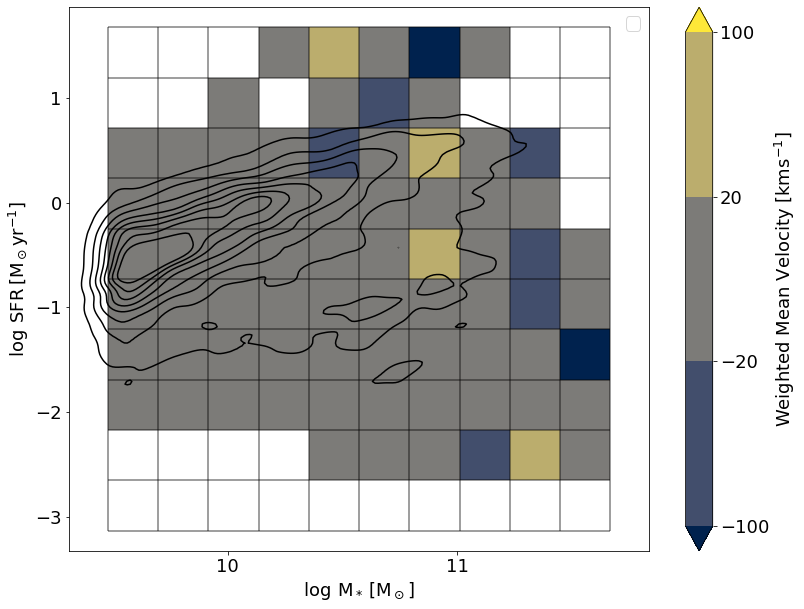

In [30]:
import matplotlib as mpl
import seaborn as sns

mass = galaxyData["Mass"].to_numpy()
sfr = galaxyData["Star Formation Rate"].to_numpy()

# Setting up the figure
plt.figure(figsize=(13,10))
plt.rcParams.update({"font.size": 18})

# Creating colourmap
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm([-100, -20, 20, 100], cmap.N, extend="both")

# Plotting the colour mesh
plt.pcolormesh(massBinVals, sfrBinVals, mean, cmap=cmap, norm=norm)

# Overlaying the density plot of mass and sfr
sns.kdeplot(x=mass, y=sfr, levels=9, color="k", linewidth=2)

# Creating gridlines to differentiate boxes
plt.vlines(massBinVals, min(sfrBinVals), max(sfrBinVals), "k", alpha=0.5)
plt.hlines(sfrBinVals, min(massBinVals), max(massBinVals), "k", alpha=0.5)

# Setting axes and labels
plt.colorbar(label="Weighted Mean Velocity $\\rm [kms^{-1}]$")
plt.xlabel("$\\rm \log \: M_* \:[M_\odot]$")
plt.ylabel("$\\rm \log \: SFR \:[M_\odot yr^{-1}]$")
plt.xticks([10, 11], [10, 11])
plt.legend()

In [50]:
''' Getting only one observation of each galaxy '''

# Reading in the galaxy
galaxyData = pd.read_csv("galaxyDataSave2.csv", delimiter=",")

# Loading the particle data
v, m = readSpectrum("linuxData/velocities.txt", "linuxData/masses.txt")

# Adding particle data to the dataframe
galaxyData["Velocities"] = v
galaxyData["Masses"] = m

# Removing nulls 
galaxyData = removeNulls(galaxyData)

# Choosing only observations with one theta and phi value
theta = "90.0"
phi = "0.0"
galaxyDataCut = galaxyData[galaxyData["Theta"] == theta]
galaxyDataCut = galaxyDataCut[galaxyDataCut["Phi"] == phi]

# Binning the galaxy
galaxyData, massBins, sfrBins, massBinVals, sfrBinVals = binGalaxy(galaxyDataCut, 10)

c:\Users\Work Account\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])


In [53]:
# Looping through all the bins to get the means
means = np.zeros((10,10))
nums = np.zeros_like(means)

# Reversing the sfr bins to get right plot ordering
ss = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# Looping through all m and s
for s in tqdm(range(10)):
    for m in range(10):

        # Slicing our dataframe
        data = galaxyData[galaxyData["Binned Sfr"] == s]
        data = data[data["Binned Mass"] == m]

        # Creating empty arrays
        vels = np.array([])
        mass = np.array([])

        # Extracting the velocities and masses
        for i in range(len(data)):
            # Getting the row
            d = data.iloc[i]

            # Extracting velocity and mass data
            vData = d["Velocities"]
            mData = d["Masses"]

            # Stripping formatting
            vData = vData[:-2]
            mData = mData[:-2]
            vData = vData.strip("][").split(",")
            mData = mData.strip("][").split(",")

            # Putting into array form
            vData = np.array(vData, dtype=float)
            mData = np.array(mData, dtype=float)

            # Appending to the end of the vels and mass arrays
            vels = np.append(vels, vData)
            mass = np.append(mass, mData)

        # Calculating the mean
        if len(vels) == 0:
            means[ss[s]][m] = float("nan")
            nums[ss[s]][m] = float("nan")
        else:
            means[ss[s]][m] = np.average(vels, weights=mass)
            nums[ss[s]][m] = len(data)

100%|██████████| 10/10 [00:01<00:00,  6.69it/s]


In [46]:
galaxyData

,Unnamed: 0.1,Unnamed: 0,GalaxyID,Mass,Star Formation Rate,Particles,Velocity,Theta,Phi,Inclination,...,Star Formation Rate Density,Stellar Density,Rotation Velocity,Mass Outflow Rate,Outflow Velocity,Mass Loading Factor,Velocities,Masses,Binned Mass,Binned Sfr
1,1,1,9350107.0,10.346332,-0.294413,True,-12.514524376495122619,0.0,0.0,0.0,...,0.008152,3.564758e+08,147.420756,0.000000,0.000000,0.000000e+00,"[-2.7670603576703299638, -26.33941498637936942...","[4685241.2595902931766, 10045298.859791282734,...",1,5.0
38,38,38,11198218.0,9.746383,-0.123239,True,13.976606320133260508,0.0,0.0,0.0,...,0.006412,4.749458e+07,104.368966,0.000000,0.000000,0.000000e+00,"[40.592665037287667035, 7.9834719314103873844,...","[2026842.646651389934, 5803713.6962476998806, ...",1,6.0
75,75,75,11200860.0,9.656018,-0.300347,True,-15.847405844046290273,0.0,0.0,0.0,...,0.007355,6.652180e+07,99.078661,0.000000,0.000000,0.000000e+00,"[-49.873012407012997357, -44.31436436901645957...","[2068735.4806402607445, 2554900.5764479401998,...",1,5.0
112,112,112,11215015.0,9.985708,-0.421928,True,-30.276054990041534325,0.0,0.0,0.0,...,0.001509,3.857842e+07,119.785043,0.000000,0.000000,0.000000e+00,"[-39.454223540135066522, -29.03957590881540340...","[2960347.0976422309102, 3213131.9493225021442,...",1,5.0
149,149,149,11222150.0,9.499276,-0.780119,True,19.450699585477232729,0.0,0.0,0.0,...,0.007089,1.348809e+08,90.530395,0.138657,224.181731,4.392055e-11,"[224.1817308125847878, 3.614987859330393044, 9...","[1818093.3663576313213, 3355466.6719114686714,...",1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210582,210582,210582,58640298.0,9.610845,-0.267056,True,-3.0976550613129550057,0.0,0.0,0.0,...,0.030581,2.308648e+08,96.535422,0.419405,508.019410,1.027517e-10,"[54.445288868258736814, 77.26680561614259137, ...","[1818183.0763167873988, 1807044.4474167863995,...",1,5.0
210651,210651,210651,58691642.0,9.531955,0.145398,True,-46.710836463513723513,0.0,0.0,0.0,...,0.323095,7.868428e+08,92.249582,-7.382690,-213.478337,-2.168998e-09,"[-165.40203173892989073, -132.5169135053117522...","[1811384.4349623706038, 2232096.2431778418747,...",1,6.0
210695,210695,210695,58783375.0,9.617083,-1.786393,True,4.714656066630765164,0.0,0.0,0.0,...,0.000719,1.820654e+08,96.882726,0.000000,0.000000,0.000000e+00,"[66.030708199072353774, 51.909309921709792884,...","[1816522.3689867641284, 1807044.4474167863995,...",1,2.0
210735,210735,210735,57789046.0,9.623958,-0.743500,True,-20.790323934499631243,0.0,0.0,0.0,...,0.011349,2.644985e+08,97.266873,-1.568449,-254.232321,-3.728316e-10,"[-206.19142723630060265, -291.2164238515385800...","[1807057.7536786707938, 1821349.322793891729, ...",1,4.0


100%|██████████| 10/10 [00:04<00:00,  2.09it/s]
c:\Users\Matth\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
No handles with labels found to put in legend.


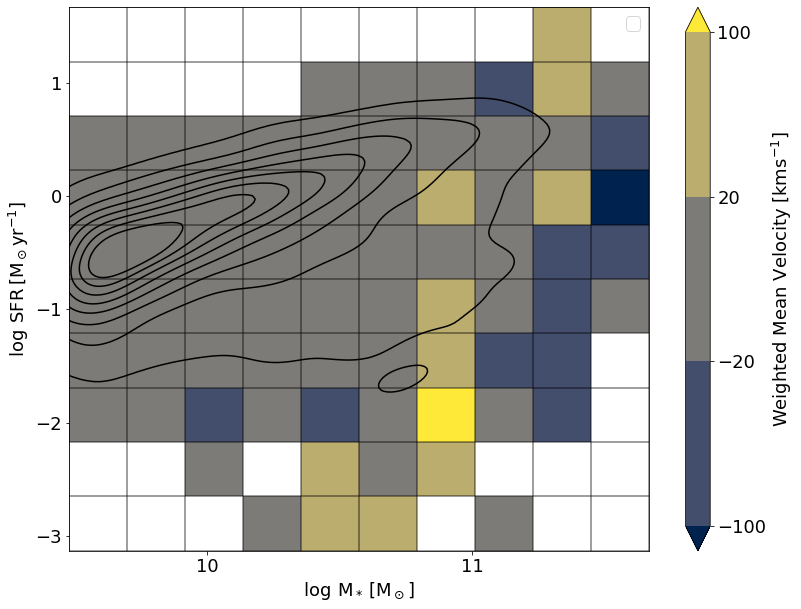

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dataAnalysisFunctions import *

galaxyData, means, nums, massBins, massBinVals, sfrBins, sfrBinVals = binEverything("ANGLE", 0.0, 0.0, 10, "none", 0)

mass = galaxyData["Mass"].to_numpy()
sfr = galaxyData["Star Formation Rate"].to_numpy()

#ss = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# Setting up the figure
plt.figure(figsize=(13,10))
plt.rcParams.update({"font.size": 18})

# Creating colourmap
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm([-100, -20, 20, 100], cmap.N, extend="both")

# Plotting the colour mesh
plt.pcolormesh(massBinVals, sfrBinVals, means, cmap=cmap, norm=norm)

# Overlaying the density plot of mass and sfr
sns.kdeplot(x=mass, y=sfr, levels=9, color="k", linewidth=2)

# Creating gridlines to differentiate boxes
plt.vlines(massBinVals, min(sfrBinVals), max(sfrBinVals), "k", alpha=0.5)
plt.hlines(sfrBinVals, min(massBinVals), max(massBinVals), "k", alpha=0.5)

# Setting axes and labels
plt.colorbar(label="Weighted Mean Velocity $\\rm [kms^{-1}]$")
plt.xlabel("$\\rm \log \: M_* \:[M_\odot]$")
plt.ylabel("$\\rm \log \: SFR \:[M_\odot yr^{-1}]$")
plt.xticks([10, 11], [10, 11])
plt.legend()

plt.xlim((min(mass), max(mass)))
plt.ylim((min(sfr), max(sfr)))

# Looping through all m and s
massBinRange = massBinVals[1] - massBinVals[0]
sfrBinRange = sfrBinVals[1] - sfrBinVals[0]


#for s in range(10):
    #for m in range(10):

       # if np.isnan(nums[ss[s]][m]):
       #     nums[ss[s]][m] = 0

       # plt.text(massBinVals[m]+ 0.25*massBinRange, sfrBinVals[ss[s]] + 0.25*sfrBinRange, str(int(nums[ss[s]][m])), fontsize=10, alpha=0.9)

c:\Users\Work Account\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N Particles"] = pd.to_numeric(df["N Particles"])
c:\Users\Work Account\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physics Project\Code\dataAnalysisFunctions.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mass"] = np.log10(df["Mass"])
c:\Users\Work Account\OneDrive\Documents\University [MPhys]\Year 4\PX4310 - Physi

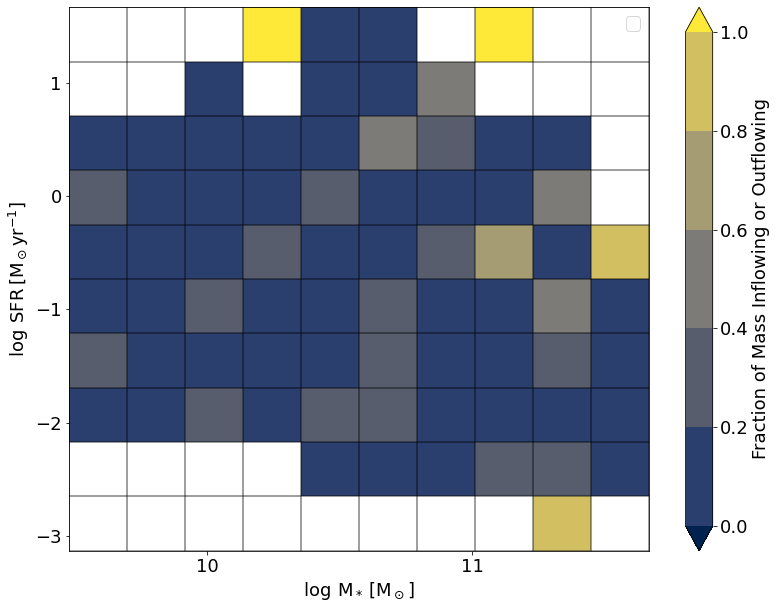

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dataAnalysisFunctions import *

galaxyData, outflowFracN, outflowFracM, inflowFracN, inflowFracM, nonDetectionN, nonDetectionM, massBins, sfrBins, massBinVals, sfrBinVals = particleFractions("none", 0.0, 0.0, 10, 2)

mass = galaxyData["Mass"].to_numpy()
sfr = galaxyData["Star Formation Rate"].to_numpy()

ss = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# Setting up the figure
plt.figure(figsize=(13,10))
plt.rcParams.update({"font.size": 18})

tot = outflowFracM + inflowFracM

# Creating colourmap
cmap = mpl.cm.cividis
norm = mpl.colors.BoundaryNorm([0, 0.2, 0.4, 0.6, 0.8, 1], cmap.N, extend="both")

# Plotting the colour mesh
plt.pcolormesh(massBinVals, sfrBinVals, tot, cmap=cmap, norm=norm)

# Overlaying the density plot of mass and sfr
#sns.kdeplot(x=mass, y=sfr, levels=9, color="k", linewidth=2)

# Creating gridlines to differentiate boxes
plt.vlines(massBinVals, min(sfrBinVals), max(sfrBinVals), "k", alpha=0.5)
plt.hlines(sfrBinVals, min(massBinVals), max(massBinVals), "k", alpha=0.5)

# Setting axes and labels
plt.colorbar(label="Fraction of Mass Inflowing or Outflowing")
plt.xlabel("$\\rm \log \: M_* \:[M_\odot]$")
plt.ylabel("$\\rm \log \: SFR \:[M_\odot yr^{-1}]$")
plt.xticks([10, 11], [10, 11])
plt.legend()